In [1]:
# Import basic library
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from os import listdir
import time
from sklearn.datasets import fetch_olivetti_faces
from sklearn import cluster
from sklearn import decomposition
from numpy.random import RandomState
import matplotlib.pyplot as plt

In [2]:
rng = RandomState(0)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\22668\scikit_learn_data


In [3]:
faces.shape

(400, 4096)

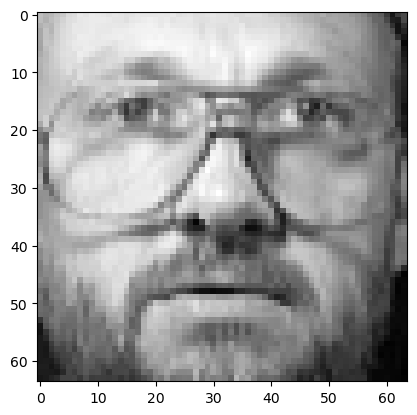

In [4]:
img_shape = (64, 64)
plt.imshow(faces[0].reshape(img_shape),cmap="gray")

# implementation

In [5]:
def nmf(X,p,n_iter=None):
    m = X.shape[0]; n = X.shape[1]
    W = np.random.rand(m,p) #W.shape = (m,p),rand함수 사용해서 반드시 0보다 큰 값으로 초기화 해야함!
    H = np.random.rand(p,n) #H.shape = (p,n)
    #print(X.shape);#print(W.shape);#print(H.shape)
    if n_iter is not None:
        for i in range(n_iter):
            W = W * ((X@H.T)/(W@H@H.T))
            H = H * ((W.T@X)/(W.T@W@H))
            
    return X,H,W
    
X,H,W = nmf(faces,p = 40,n_iter = 2000)

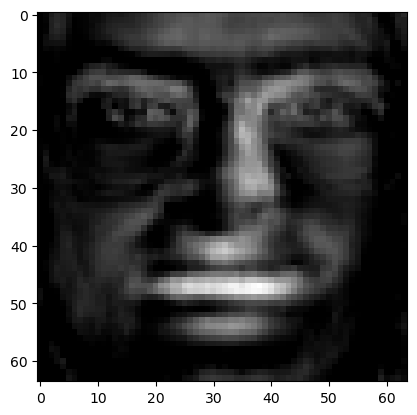

In [25]:
plt.imshow(H[16].reshape(img_shape),cmap="gray")

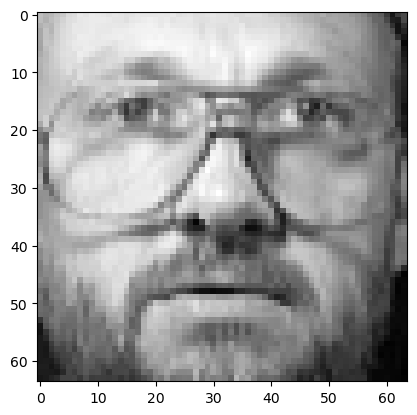

In [7]:
plt.imshow(X[0].reshape(img_shape),cmap="gray")

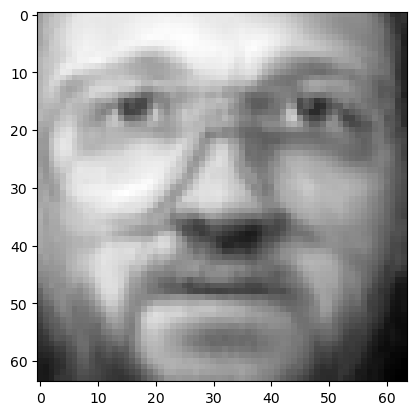

In [8]:
_t = np.zeros(img_shape[0]*img_shape[1])
for i in range(len(W[0])):
    _t = _t + W[0][i] * H[i]

plt.imshow(_t.reshape(img_shape),cmap="gray")